In [14]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/CVD_Vital_SIgns.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Accuracy: 0.9269279931827865

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1230
           1       1.00      0.90      0.95      3464

    accuracy                           0.93      4694
   macro avg       0.89      0.95      0.91      4694
weighted avg       0.94      0.93      0.93      4694


Confusion Matrix:
 [[1230    0]
 [ 343 3121]]


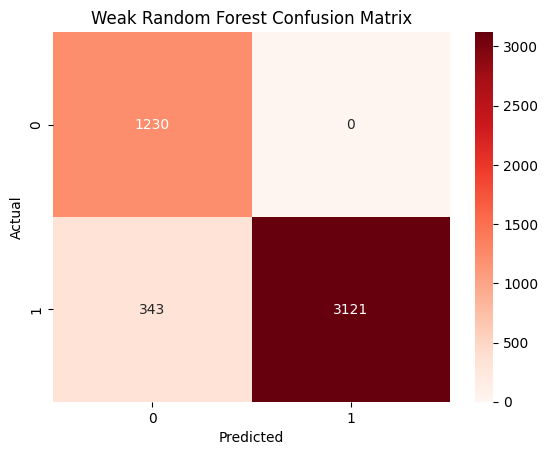

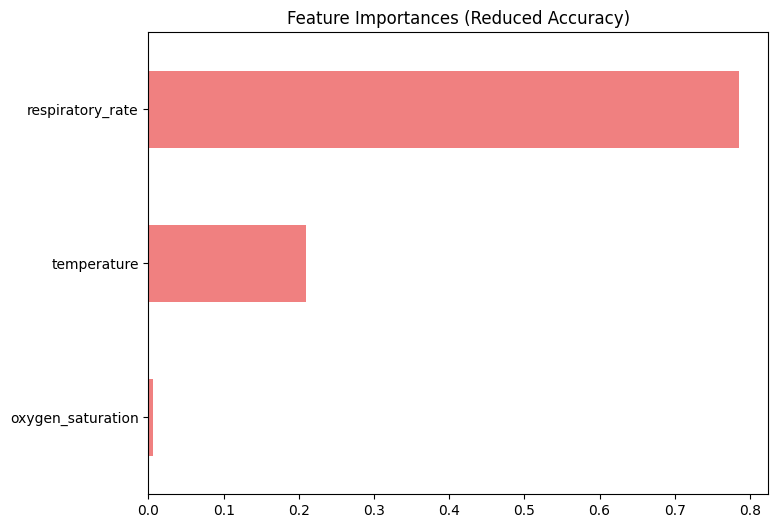

In [21]:
# STEP 3: Preprocessing (Reduced Accuracy Version)
# df = df.drop(['subject_id', 'icustay_id'], axis=1)

# Drop key features to make it harder for model to learn
X = df.drop(['Label', 'heart_rate', 'blood_pressure'], axis=1)
y = df['Label']

# STEP 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# STEP 5: Train Weaker Random Forest
rf_model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=22)
rf_model.fit(X_train, y_train)

# STEP 6: Make Predictions
y_pred = rf_model.predict(X_test)

# STEP 7: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# STEP 8: Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Weak Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Feature Importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6), color='lightcoral')
plt.title("Feature Importances (Reduced Accuracy)")
plt.show()
